# Regresión Lineal Multiple

En regresión múltiple, el objetivo es construir un modelo probabilístico que relacione una variable dependiente y a más de una variable independiente o predictores. Represente con k el número de variables predictores $(k≥2)$ y denote estos predictores por $x_1$, $x_2$,…, $x_k$. Por ejemplo, al tratar de predecir el precio de venta de una casa, se podría tener k = 3 con $x_1 = tamaño$ ($pie^{2}$), $x_2 = edad$ (años) y $x_3 = número\hspace{1mm}de\hspace{1mm}habitaciones$.

La ecuación general del modelo de regresión múltiple aditivo es

$$Y=\beta_0+\beta_1 x_1+\beta_2 x_2+⋯+\beta_k x_k+∈$$

Donde $E(∈)=0$ y $V(∈)=\sigma^2$. Además, con el fin de probar hipótesis y calcular intervalos de confianza y de pronóstico, se supone que ∈ está normalmente distribuida.

#### Ejemplo Regresión lineal múltiple

Los siguientes datos describen un experimento para evaluar el impacto de las variables $x_1=fuerza$ (g), $x_2=potencia$ (mw), $x_3=temperatura$ (°C) y $x_4=tiempo$ (ms) sobre $y=resistencia$ (al corte del cemento). Los siguientes datos se generaron para ser consistentes con la información del artículo.

In [1]:
# La base de datos que se va a generar se va a guardar en diferentes listas para
# acomodarlas posteriormente en un DataFrame
Fuerza = [30, 40, 30, 40, 30, 40, 30, 40, 30, 40, 30, 40, 30, 40, 30, 40, 
          25, 45, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]

Potencia = [60, 60, 90, 90, 60, 60, 90, 90, 60, 60, 90, 90, 60, 60, 90, 
            90, 75, 75, 45, 105, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]

Temperatura = [175, 175, 175, 175, 225, 225, 225, 225, 175, 175, 175, 175, 
               225, 225, 225, 225, 200, 200, 200, 200, 150, 250, 200, 200, 
               200, 200, 200, 200, 200, 200]

Tiempo = [15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 25, 25, 
          20, 20, 20, 20, 20, 20, 10, 30, 20, 20, 20, 20, 20, 20]

Resistencia = [26.2, 26.3, 39.8, 39.7, 38.6, 35.5, 48.8, 37.8, 26.6, 23.4, 
               38.6, 52.1, 39.5, 32.3, 43, 56, 35.2, 46.9, 22.7, 58.7, 34.5,
               44, 35.7, 41.8, 36.5, 37.6, 40.3, 46, 27.8, 40.3]

In [2]:
# Con el siguiente código se convierten las listas a un diccionario
# Posteriormente se convierten el diccionario en un DataFrame 
# con una sola línea de código
import pandas as pd

datos = {'Fuerza': Fuerza, 'Potencia':Potencia, 'Temperatura': Temperatura,
        'Tiempo': Tiempo, 'Resistencia': Resistencia}

datos_df = pd.DataFrame(datos)

Las primeras 5 filas de esta tabla se ven así:

In [66]:
datos_df.head()

,Fuerza,Potencia,Temperatura,Tiempo,Resistencia
0,30,60,175,15,26.2
1,40,60,175,15,26.3
2,30,90,175,15,39.8
3,40,90,175,15,39.7
4,30,60,225,15,38.6


In [67]:
# Importamos la librería numpy para la simplificación de operaciones
import statsmodels.api as sm

reg = sm.OLS.from_formula('Resistencia ~ Fuerza + Potencia + Temperatura + Tiempo', data=datos_df).fit()  #Ordinary Least Squares

anova_results = sm.stats.anova_lm(reg, typ=1)

In [68]:
print(reg.summary())
print('\n','\n','\n')  #Agrega espacios entre el resumen de la regresión y el de la tabla de ANOVA

# Imprime resultados de ANOVA para regresión
print(' '*20,'Resultados de ANOVA')
print('====================================================================')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:            Resistencia   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.59e-06
Time:                        16:35:33   Log-Likelihood:                -89.050
No. Observations:                  30   AIC:                             188.1
Df Residuals:                      25   BIC:                             195.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -37.4767     13.100     -2.861      

In [69]:
# Definimos nuestra propia tabla anova con los resultados generados por la librería

anova_tabla = {'Fuente': ['Modelo', 'Error', 'Total'],
               'GL': [reg.df_model, reg.df_resid, reg.df_model+reg.df_resid],
               'Sum cuadrados': [reg.ess, reg.ssr, reg.ess+reg.ssr],
               'Cuad medios': [reg.mse_model, reg.mse_resid, ''],
               'Estadist F': [reg.fvalue, '', ''],
               'valor-p F': [reg.f_pvalue, '', '']}

anova_tabla_df = pd.DataFrame(anova_tabla)

In [70]:
print(anova_tabla_df)

   Fuente    GL  Sum cuadrados Cuad medios Estadist F    valor-p F
0  Modelo   4.0    1660.140000     415.035       15.6  1.59242e-06
1   Error  25.0     665.118667     26.6047                        
2   Total  29.0    2325.258667                                    


In [71]:
print(reg.summary())
print('\n','\n','\n')  #Agrega espacios entre el resumen de la regresión y el de la tabla de ANOVA

# Imprime resultados de ANOVA para regresión
print(' '*20,'Resultados de ANOVA')
print('====================================================================')
print(anova_tabla_df)

                            OLS Regression Results                            
Dep. Variable:            Resistencia   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.59e-06
Time:                        16:35:38   Log-Likelihood:                -89.050
No. Observations:                  30   AIC:                             188.1
Df Residuals:                      25   BIC:                             195.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -37.4767     13.100     -2.861      

## Interpretaciones de los resutados del modelo de regresión lineal múltiple

Calcule una predicción puntual de la resistencia debida a una fuerza de 35g, potencia de 75 mw, temperatura de 200 grados y tiempo de 20 ms.

In [72]:
X = {'Fuerza': [35], 'Potencia': [75], 'Temperatura': [200], 'Tiempo': [20]}

Para este grupo de valores obtenemos en a siguiente celda la estimación puntual, el intervalo de estimación y el intervalo de predicción. 

El intervalo de estimación, en las columnas mean_ci_lower (intervalo de confianza limite inferior para la media) y mean_ci_upper (intervalo de confianza ímite superior para la media) sería [36.46, 40.35]

El intervalo de predicción lo encontramos en las columnas obs_ci_lower (intervalo de confianza límite inferior de nueva observación) y obs_ci_upper (intervalo de confianza límite superior de nueva observación) sería [27.60,49.2]. 

In [73]:
prediccion = reg.get_prediction(X).summary_frame(alpha=0.05)
prediccion

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,38.406667,0.941714,36.467171,40.346163,27.608011,49.205323


In [74]:
print("La estimación puntual para los valores predictores es: ", 
      prediccion['mean'][0], 
      "con un intervalo al 95% de:", 
      prediccion['mean_ci_lower'][0],
      "a", 
      prediccion['mean_ci_upper'][0])

La estimación puntual para los valores predictores es:  38.40666666666674 con un intervalo al 95% de: 36.4671707814011 a 40.34616255193237


### $R^{2}$ ajustada

La proporción explicada por el modelo de regresión múltiple es $R^2=1-SSE/SST$, el coeficiente de determinación múltiple. Este valor se ajusta por el número de parámetros del modelo mediante 

$$R_a^2=[(n-1) R^2-k]/[n-(k+1)] $$

El objetivo de este ajuste es equilibrar la ganancia en el ajuste con el costo de utilizar mas parámetros en nuestro modelo.

En este caso el valor de $R^{2}$ ajustada es:

In [56]:
print("El ajuste del modelo es: ", reg.rsquared_adj)

El ajuste del modelo es:  0.6681927630703738


### Inferencias acerca de los parámetros del modelo

Las inferencias en relación con una sola $\beta_{i}$ están basadas en la variable estandarizada

$$ T = \frac{\hat{\beta}_{i}-\beta_{i}}{S_{\hat{\beta}_{i}}} $$

la cual tiene una distribución $t$ con $n-(k+1)$ grados de libertad.

Podemos acceder directamente a los estimadores y revisar sus valores.

In [57]:
print("Los parámetros tenemos son: ")
print(reg.params)

Los parámetros tenemos son: 
Intercept     -37.476667
Fuerza          0.211667
Potencia        0.498333
Temperatura     0.129667
Tiempo          0.258333
dtype: float64


In [58]:
print("Las desviaciones de cada uno de estos estimadores son: ")
print(reg.bse)

Las desviaciones de cada uno de estos estimadores son: 
Intercept      13.099642
Fuerza          0.210574
Potencia        0.070191
Temperatura     0.042115
Tiempo          0.210574
dtype: float64


Si quisieramos calcular el intervalo de confianza para $\beta_1$, en este caso la beta que representa la Fuerza en nuestro modelos tendríamos:

In [59]:
reg.bse[1]

0.21057360813844747

Calculamos el estadistico t para no buscarlo en tablas:

In [60]:
from scipy.stats import t

alfa = 0.05
grados_libertad = reg.nobs-(reg.df_model+1)

estadistico_t = t.ppf(1-alfa/2, grados_libertad, loc=0, scale=1)

Generamos el límite superior:

In [61]:
reg.params[1] + estadistico_t*reg.bse[1] 

0.645351130820164

Generamos el límite inferior:

In [53]:
reg.params[1] - estadistico_t*reg.bse[1] 

-0.2220177974868307

### Prueba de utilidad del modelo

Una prueba de la utilidad del modelo considera la afirmación que $H_0: \beta_{1}=\beta_{2}=...=\beta_{k}=0$. Si por lo menos una de esas $\beta$ no es 0, los predictores correspondientes son útiles. La prueba está basada en un estadístico con una distribución $F$ particular cuando $H_0$ es real.

Hipótesis nula: $H_0: \beta_{1}=\beta_{2}=...=\beta_{k}=0$ <br>
Hipótesis alternativa: $H_{a}$: al menos $\beta_{i} \ne 0 \hspace{1mm} (i=1,…,k)$ <br>
Valor del estadístico de prueba $f=(R^2/k)/((1-R^2)/[n-(k+1)])$ <br>
Región e rechazo para una prueba de nivel a: $f≥F_{\alpha,k,n-(k+1)}$ <br>


Salvo por un múltiplo constante, aquí el estadístico de prueba es $R^{2}/(1-R^{2})$, el cociente entre la variación explicada y la no explicada. Si la proporción de la variación explicada es alta en relación con la no explicada, naturalmente desearíamos rechazar $H_0$ y confirmar la utilidad del modelo. Calculemos algunos valores para darle sentido a esta prueba de hipótesis:

In [151]:
# Primero veamos cual es el porcentaje de la variación explicada por el modelo
print("El valor del coeficiente de determianción multiple (variación explicada): ", reg.rsquared)

# Por lo tanto, la variacion no explicada
print("El valor de la variación no explicada es: ", 1-reg.rsquared)

# Calculamos el valor del estadístico f
# k representa el numero de paráetros y n el numero de observaciones estos valores los
# obtenemos directo desde los resultados del modelo
f = (reg.rsquared/4)/((1-reg.rsquared)/(reg.nobs-(reg.df_model+1)))
print("El valor del estadístico f es: ", f )

El valor del coeficiente de determianción multiple (variación explicada):  0.7139592785089429
El valor de la variación no explicada es:  0.2860407214910571
El valor del estadístico f es:  15.600035783088329


Este valor puede ser consultado directamente desde uno de las propiedades del modelo, se puede observar una ligera diferencia en los ultimos decimales:

In [153]:
print("El valor del estadístico f es: ", reg.fvalue)
print("El valor-p de este estadístico es: ", reg.f_pvalue)

El valor del estadístico f es:  15.600035783088327
El valor-p de este estadístico es:  1.5924160694543982e-06


Por lo que se rechaza la prueba de hipótesis y se llega a la conclusión de que existe una relación útil entre $y$ y al menos uno de los cuatro predictores del modelo.

Generamos gráficos de diagnóstico para validar nuestros resultados.

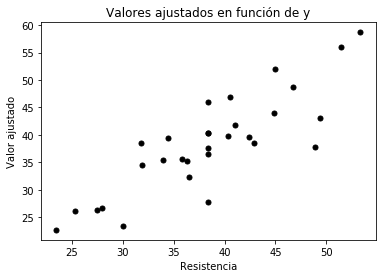

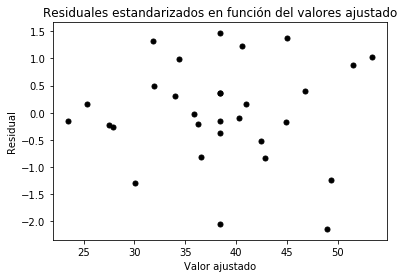

In [160]:
# Redefinimos las variables residuales y valores ajustados para obtener 
# los valores de la nueva regresión y generar nuevamente gráficos de diagnostico
residuales = reg.resid
valores_ajustados = reg.fittedvalues

import matplotlib.pyplot as plt

# Residuales generados por la librería
plt.scatter(x=reg.fittedvalues, y=datos_df['Resistencia'],  marker='o', c='black', s=25)
plt.title("Valores ajustados en función de y")
plt.xlabel("Resistencia")
plt.ylabel("Valor ajustado")
plt.show()

# Residuales estandarizados generados por nostros
plt.scatter(x=reg.fittedvalues, y=reg.resid_pearson,  marker='o', c='black', s=25)
plt.title("Residuales estandarizados en función del valores ajustado")
plt.xlabel("Valor ajustado")
plt.ylabel("Residual")
plt.show()

Todos los resultados anteriores se encuentran dentro del resumen principal arrojado por el método OLS.